# Results: neural networks and naive Bayes

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [43]:
DATA_TARGET_DIR = '../data/nn_nb_comparison'
EXPERIMENT_CATALOG_PATH = os.path.join(
    DATA_TARGET_DIR, 'experiment_catalog.csv'
)

In [97]:
experiment_catalog = pd.read_csv(EXPERIMENT_CATALOG_PATH)

# Values from string to list if needed.
experiment_catalog['naive_bayes_accuracy'] = experiment_catalog['naive_bayes_accuracy'].apply(
    lambda s: [float(v) for v in s[1:-1].replace('\n', ' ').split(' ') if v != '']
)
experiment_catalog['dims'] = experiment_catalog['dims'].apply(
    lambda s: [int(d.lstrip().rstrip()) for d in s[1:-1].split(',')]
)

experiment_catalog['naive_bayes_accuracy_mean'] = experiment_catalog['naive_bayes_accuracy'].apply(lambda l: np.mean(l))
experiment_catalog['naive_bayes_accuracy_std'] = experiment_catalog['naive_bayes_accuracy'].apply(lambda l: np.std(l))

experiment_catalog

,experiment_id,q,k,matrix_type,matrix_entropy,np_seed,naive_bayes_accuracy,sigma,epsilon,n_samples_training,...,dims,n_params_model,n_epochs,learning_rate,batch_size,final_training_accuracy,final_test_accuracy,baseline_accuracy,naive_bayes_accuracy_mean,naive_bayes_accuracy_std
0,nb_worst_eps0_0,4,4,mixed_index_sets,0.346574,18,"[0.2568, 0.246, 0.2464, 0.2536, 0.2586, 0.2644...",0.0,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.752204,0.2830,0.25,0.297288,0.040099
1,nb_worst_eps0_1,4,4,mixed_index_sets,0.341525,12,"[0.2558, 0.253, 0.2434, 0.264, 0.2696, 0.266, ...",0.2,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.745393,0.2930,0.25,0.301625,0.045330
2,nb_worst_eps0_2,4,4,mixed_index_sets,0.328995,12,"[0.2568, 0.251, 0.2532, 0.2648, 0.2576, 0.2718...",0.4,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.754006,0.2935,0.25,0.302538,0.044822
3,nb_worst_eps0_3,4,4,mixed_index_sets,0.312281,12,"[0.2488, 0.25, 0.2572, 0.2658, 0.2672, 0.2674,...",0.6,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.754006,0.3300,0.25,0.301462,0.043565
4,nb_worst_eps0_4,4,4,mixed_index_sets,0.320244,16,"[0.248, 0.2524, 0.2498, 0.2676, 0.265, 0.27, 0...",0.8,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.782652,0.3415,0.25,0.297963,0.037337
5,nb_worst_eps0_5,4,4,mixed_index_sets,0.308625,16,"[0.2632, 0.258, 0.254, 0.2608, 0.2632, 0.2714,...",1.0,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.798478,0.3770,0.25,0.289813,0.028431
6,nb_worst_eps0_6,4,4,mixed_index_sets,0.296184,16,"[0.258, 0.2562, 0.258, 0.2606, 0.2688, 0.2616,...",1.2,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.791466,0.3865,0.25,0.281137,0.019710
7,nb_worst_eps0_7,4,4,mixed_index_sets,0.283284,16,"[0.2558, 0.2474, 0.2516, 0.2578, 0.2714, 0.261...",1.4,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.795873,0.4370,0.25,0.274537,0.015717
8,nb_worst_eps0_8,4,4,mixed_index_sets,0.270197,16,"[0.2582, 0.2546, 0.2498, 0.2528, 0.2632, 0.256...",1.6,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.825321,0.4800,0.25,0.271788,0.015298
9,nb_worst_eps0_9,4,4,mixed_index_sets,0.257137,16,"[0.2502, 0.2502, 0.245, 0.243, 0.2504, 0.2534,...",1.8,0.0,5000,...,"[64, 64, 4]",4420,150,0.001,32,0.799279,0.4935,0.25,0.263250,0.017177


Text(0.5, 1.0, "NN vs NB's worst performance\n($q=4, k=4, \\epsilon$=0)")

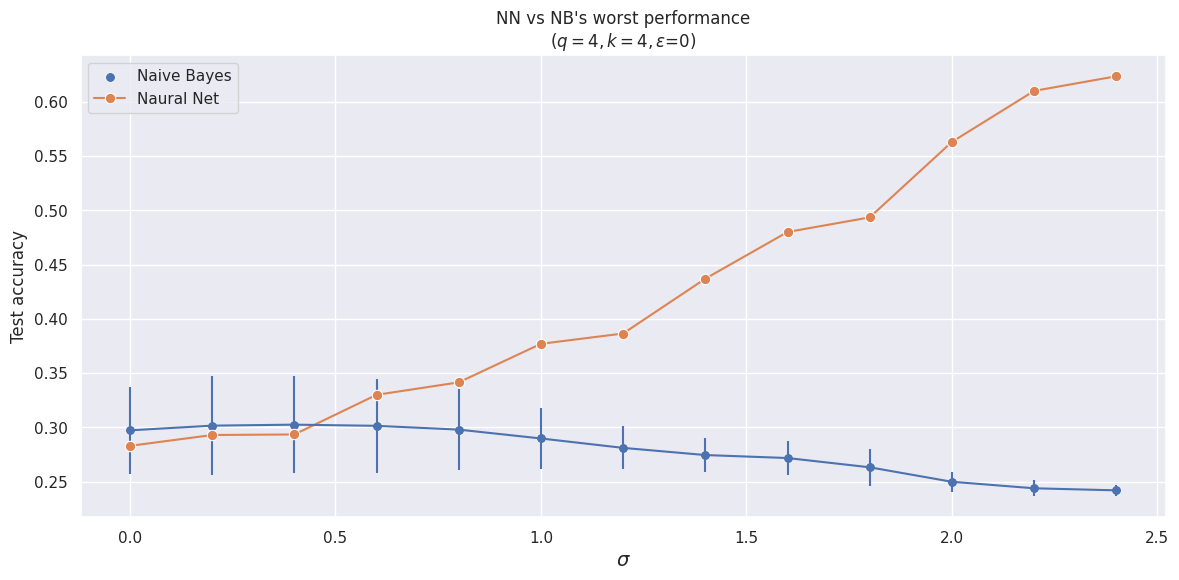

In [95]:
condition = experiment_catalog['experiment_id'].str.contains('worst')

fig = plt.figure(figsize=(14, 6))

sns.scatterplot(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['naive_bayes_accuracy_mean'],
    color=sns.color_palette()[0],
    label='Naive Bayes',
    s=50
)

plt.errorbar(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['naive_bayes_accuracy_mean'],
    yerr=experiment_catalog[condition]['naive_bayes_accuracy_std'],
    color=sns.color_palette()[0],
    ls=None
)

sns.lineplot(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['final_test_accuracy'],
    color=sns.color_palette()[1],
    label='Naural Net',
    marker='.',
    markersize=15
)

plt.xlabel('$\sigma$', fontsize=14)
plt.ylabel('Test accuracy')
plt.title("NN vs NB's worst performance\n($q=4, k=4, \epsilon$=0)")

Text(0.5, 1.0, "NN vs NB's best performance\n($q=4, k=4, \\epsilon$=0)")

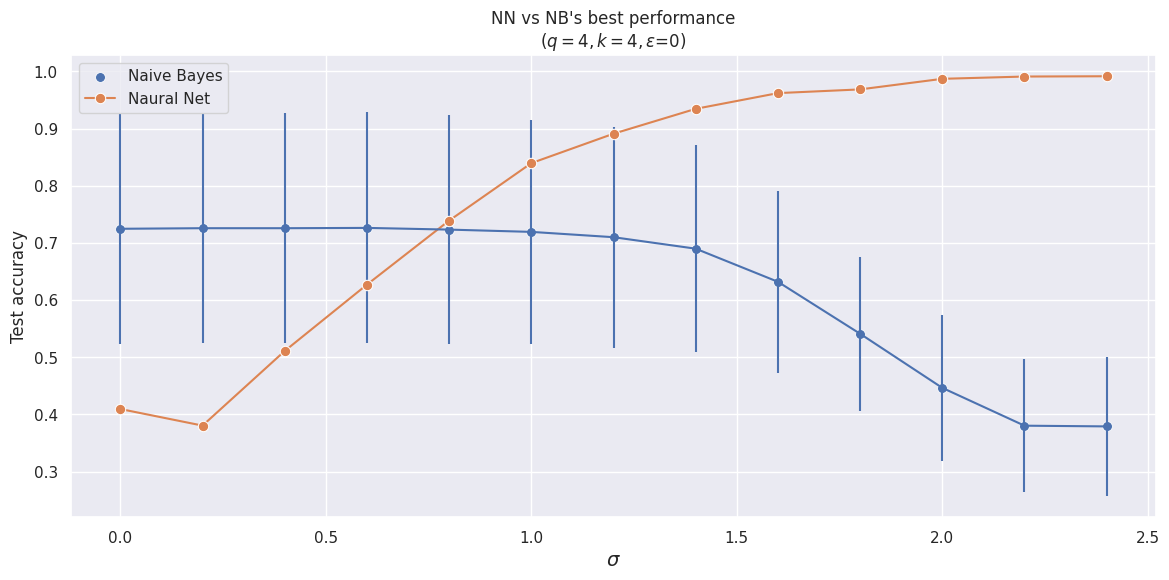

In [99]:
condition = experiment_catalog['experiment_id'].str.contains('best')

fig = plt.figure(figsize=(14, 6))

sns.scatterplot(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['naive_bayes_accuracy_mean'],
    color=sns.color_palette()[0],
    label='Naive Bayes',
    s=50
)

plt.errorbar(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['naive_bayes_accuracy_mean'],
    yerr=experiment_catalog[condition]['naive_bayes_accuracy_std'],
    color=sns.color_palette()[0],
    ls=None
)

sns.lineplot(
    x=experiment_catalog[condition]['sigma'],
    y=experiment_catalog[condition]['final_test_accuracy'],
    color=sns.color_palette()[1],
    label='Naural Net',
    marker='.',
    markersize=15
)

plt.xlabel('$\sigma$', fontsize=14)
plt.ylabel('Test accuracy')
plt.title("NN vs NB's best performance\n($q=4, k=4, \epsilon$=0)")